In [1]:
# 기본
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게...
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 분류 알고리즘
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# 회귀 알고리즘
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# 분류용 평가 함수
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용 평가 함수
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### 데이터를 불러온다.

In [2]:
df1 = pd.read_csv('data/boston.csv')
df1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.5380,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.4690,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.4690,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.4580,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.4580,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,0.05023,35.0,6.06,0,0.4379,5.706,28.4,6.6407,1,304,16.9,394.02,12.43,17.1
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83,19.4
333,0.05083,0.0,5.19,0,0.5150,6.316,38.1,6.4584,5,224,20.2,389.71,5.68,22.2
334,0.03738,0.0,5.19,0,0.5150,6.310,38.5,6.4584,5,224,20.2,389.40,6.75,20.7


### 데이터 전처리

In [3]:
# 입력과 결과로 나눈다.
X = df1.drop('target', axis=1)
y = df1['target']

In [4]:
# 표준화
scaler1 = StandardScaler()
scaler1.fit(X)
X = scaler1.transform(X)

In [5]:
print(X)
print(y)

[[-0.63326028  0.12485095 -1.03628034 ... -1.07088823  0.41031054
  -0.92655695]
 [-0.60097475 -0.58885279 -0.25831126 ...  0.06047401  0.41031054
  -0.22972861]
 [-0.60100552 -0.58885279 -0.25831126 ...  0.06047401  0.31149419
  -1.08568842]
 ...
 [-0.56479774 -0.58885279 -0.56557636 ...  1.14658176  0.23574309
  -0.80930218]
 [-0.5854857  -0.58885279 -0.56557636 ...  1.14658176  0.22821654
  -0.63006989]
 [-0.58205565 -0.58885279 -0.56557636 ...  1.14658176  0.41031054
  -0.41901131]]
0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
331    17.1
332    19.4
333    22.2
334    20.7
335    21.1
Name: target, Length: 336, dtype: float64


### 기본 모델을 통한 교차 검증

In [6]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [7]:
# KNN
model1 = KNeighborsRegressor()
r1 = cross_val_score(model1, X, y, scoring='r2', cv=kfold)
print(f'평균 성능 수치 : {r1.mean()}')

평균 성능 수치 : 0.8009118485899039


### 하이퍼 파라미터 튜닝

In [8]:
# n_neighbors : 이웃의 개수
params = {
    'n_neighbors' : list(range(1, 21))
}

tmp_model1 = KNeighborsRegressor()
kfold2 = KFold(n_splits=10, shuffle=True, random_state=1)
grid1 = GridSearchCV(tmp_model1, param_grid=params, scoring='r2', cv=kfold)
grid1.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid1.best_params_}')
print(f'최적의 모델 평균 성능 : {grid1.best_score_}')

최적의 하이퍼 파라미터 : {'n_neighbors': 3}
최적의 모델 평균 성능 : 0.8376627503363364


In [9]:
print(f'KNN Basic : {r1.mean()}')
print(f'KNN Tuning : {grid1.best_score_}')

KNN Basic : 0.8009118485899039
KNN Tuning : 0.8376627503363364


### 최종평가를 수행한다.

In [10]:
best_model1 = grid1.best_estimator_

In [11]:
# 학습용과 검증용으로 데이터를 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [12]:
# 학습용 데이터로 학습을 시킨다.
best_model1.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [13]:
# 학습용 데이터를 통해 예측 결과를 가져온다.
y_pred1 = best_model1.predict(X_train)

In [14]:
r1 = r2_score(y_train, y_pred1)
r2 = mean_squared_error(y_train, y_pred1)

print('KNN 학습 데이터 평가')
print(f'r2 : {r1.mean()}')
print(f'mean_squared_error : {r2.mean()}')

KNN 학습 데이터 평가
r2 : 0.9223076745744713
mean_squared_error : 6.466534391534389


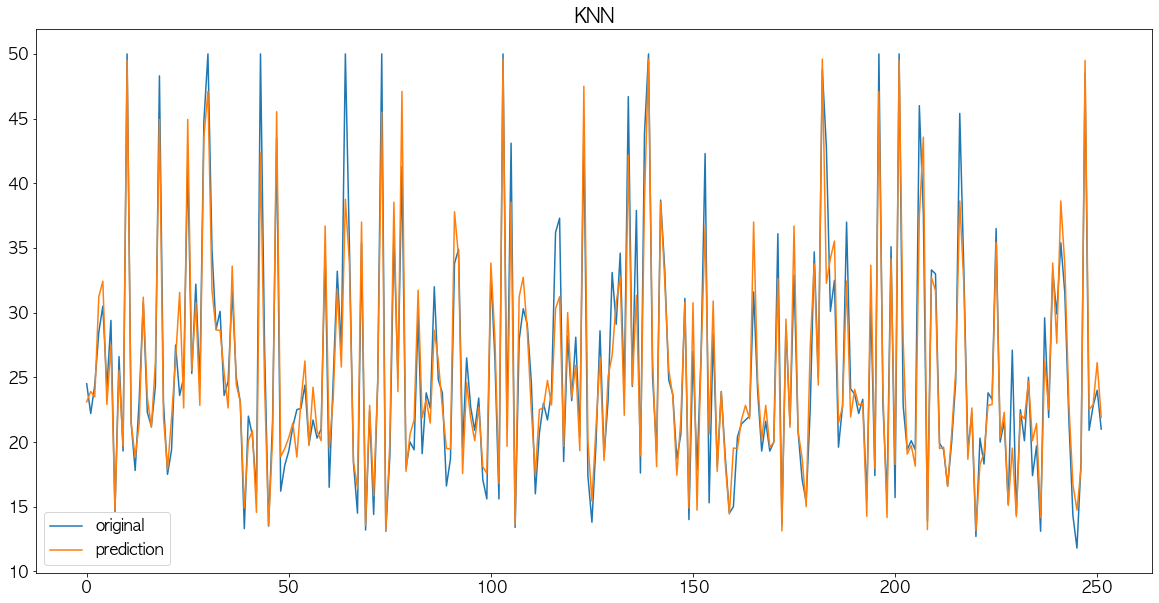

In [15]:
plt.plot(y_train.values, label='original')
plt.plot(y_pred1, label='prediction')
plt.legend()
plt.title('KNN')
plt.show()

In [16]:
# 검증용 데이터를 통해 예측 결과를 가져온다.
y_pred1 = best_model1.predict(X_test)

In [17]:
r1 = r2_score(y_test, y_pred1)
r2 = mean_squared_error(y_test, y_pred1)

print('KNN 검증 데이터 평가')
print(f'r2 : {r1.mean()}')
print(f'mean_squared_error : {r2.mean()}')

KNN 검증 데이터 평가
r2 : 0.8207188105875496
mean_squared_error : 7.319021164021164


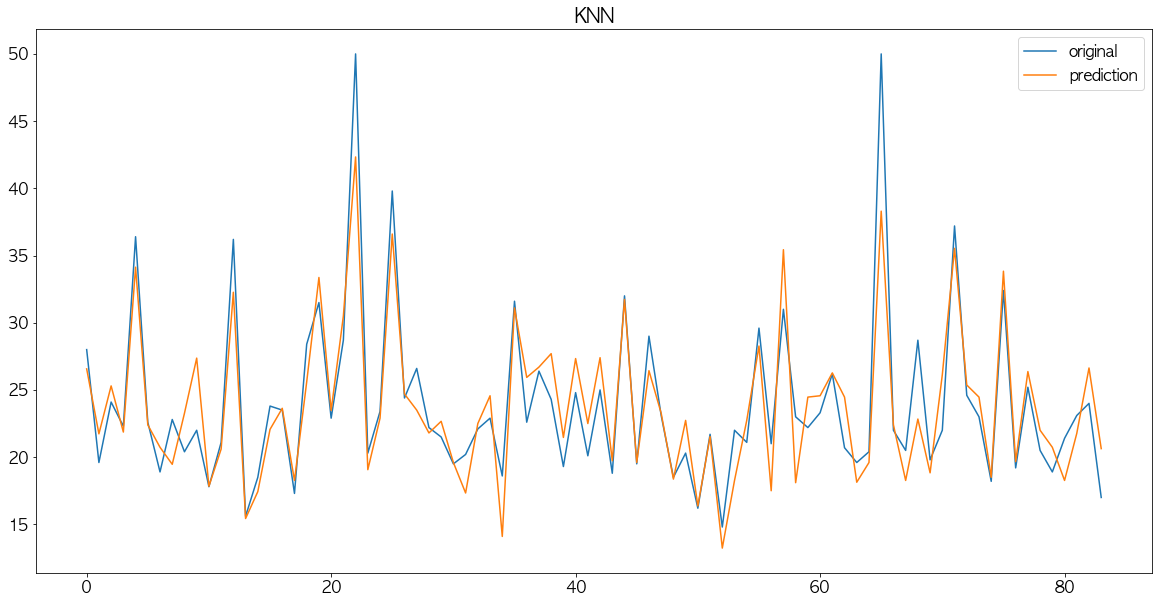

In [18]:
plt.plot(y_test.values, label='original')
plt.plot(y_pred1, label='prediction')
plt.legend()
plt.title('KNN')
plt.show()

### 전체 데이터를 학습시킨다

In [19]:
best_model1.fit(X, y)

KNeighborsRegressor(n_neighbors=3)

### 데이터를 예측한다.

In [20]:
# 예측할 데이터를 불러온다.
df2 = pd.read_csv('data/boston_new.csv')
df2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.03427,0,5.19,0,0.515,5.869,46.3,5.2311,5,224,20.2,396.90,9.80
1,0.03041,0,5.19,0,0.515,5.895,59.6,5.6150,5,224,20.2,394.81,10.56
2,0.03306,0,5.19,0,0.515,6.059,37.3,4.8122,5,224,20.2,396.14,8.51
3,0.05497,0,5.19,0,0.515,5.985,45.4,4.8122,5,224,20.2,396.90,9.74
4,0.06151,0,5.19,0,0.515,5.968,58.5,4.8122,5,224,20.2,396.90,9.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.06263,0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
166,0.04527,0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
167,0.06076,0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
168,0.10959,0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [21]:
# 전처리
X = scaler1.transform(df2)
X

array([[-0.59026931, -0.58885279, -0.56557636, ...,  1.14658176,
         0.41031054, -0.11917412],
       [-0.59620652, -0.58885279, -0.56557636, ...,  1.14658176,
         0.35956701,  0.00813106],
       [-0.59213046, -0.58885279, -0.56557636, ...,  1.14658176,
         0.39185835, -0.3352579 ],
       ...,
       [-0.54952402, -0.58885279,  0.5360017 , ...,  1.50861767,
         0.41031054, -0.81600245],
       [-0.47441672, -0.58885279,  0.5360017 , ...,  1.50861767,
         0.3265473 , -0.67529673],
       [-0.57005817, -0.58885279,  0.5360017 , ...,  1.50861767,
         0.41031054, -0.4407872 ]])

In [22]:
# 예측한다.
y_pred1 = best_model1.predict(X)

In [23]:
# 저장한다.
df2['target'] = y_pred1
df2.to_csv('data/boston_KNN.csv')